<a href="https://colab.research.google.com/github/uvsrahul1234/VenkataSaiRahul_INFO5731_Spring2025/blob/main/Unnam_Venkata_Assignment_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from **scratch instead of using any pre-existing libraries** to do so:

(1) Count the frequency of all the N-grams (N=3) and (N=2).

(2) Calculate the probabilities for all the bigrams in the dataset by using the formula  count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative
probabilities of each review in terms of other reviews (abstracts, or tweets) by using the formula  frequency (noun phrase) / max frequency (noun phrase) on the whole dataset.

Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [1]:
# Write your code here

# importing necessary libraries
import pandas as pd
import re
import numpy as np
import spacy

# loading spacy model
nlp = spacy.load("en_core_web_sm")

# tokenizing to find all the text
def tokenize(text):
  return re.findall(r'\b\w+\b', text.lower())

# generating n grams based on the number
def generate_ngrams(tokens, n):
  return [tuple(tokens[i:i+n]) for i in range(len(tokens)-n+1)]

# return total n gram count as dictionary
def count_ngrams(reviews, n):
  ngram_list = []
  for review in reviews:
    tokens = tokenize(review)
    ngrams = generate_ngrams(tokens, n)
    ngram_list.extend(ngrams)

  unique_ngrams, counts = np.unique(ngram_list, return_counts=True, axis=0)
  return dict(zip(map(tuple, unique_ngrams), counts))

# calculate bigram probability
def calculate_bigram_probabilities(reviews):
  unigram_freq = {key[0]: value for key, value in count_ngrams(reviews, 1).items()}
  bigram_probs = {}
  for bigram, count in bigram_freq.items():
    w1, w2 = bigram
    bigram_probs[bigram] = count / unigram_freq.get(w1, 1)
  return bigram_probs

# calculate noun phrases
def extract_noun_phrases(reviews):
  noun_phrases = {}
  data = {}
  for i, review in enumerate(reviews):
    doc = nlp(review)
    ph = [chunk.text.lower() for chunk in doc.noun_chunks]
    for phrase in ph:
      noun_phrases[phrase] = noun_phrases.get(phrase, 0) + 1
    data[review] = ph
  return noun_phrases

# calculate noun phrases probability
def calculate_relative_probabilities(reviews):
  noun_phrases = extract_noun_phrases(reviews)
  max_freq = max(noun_phrases.values()) if noun_phrases else 1

  relative_probs = []
  for review in reviews:
    review_nps = extract_noun_phrases([review])
    row = {np: (review_nps.get(np, 0) / max_freq) for np in noun_phrases.keys()}
    relative_probs.append(row)

  return relative_probs

# Loading the dataset
df = pd.read_csv('imdb_review_cleaned_part.csv')
df.dropna(inplace=True)
reviews = df['clean_review'].tolist()

# PART 1: Count the frequency of all the N-grams (N=3) and (N=2).

bigram_freq = count_ngrams(reviews, 2)
trigram_freq = count_ngrams(reviews, 3)

print("PART 1")
print("Bigram Frequencies:", bigram_freq)
print(f"Trigram Frequencies: {trigram_freq}\n")

# PART 2: Calculate the probabilities for all the bigrams

bigram_probs = calculate_bigram_probabilities(reviews)
print("PART 2")
print(f"Bigram Probabilities: {bigram_probs}\n")

# PART 3: Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews

noun_phrases = extract_noun_phrases(reviews)
relative_probs = calculate_relative_probabilities(reviews)

print("PART 3")
print("Noun Phrases:", noun_phrases)
print("Relative Probabilities:", relative_probs)

# Print out the result in a table
df1 = pd.DataFrame(relative_probs).fillna(pd.NA)
df1['index'] = [f"Review {i+1}" for i in range(len(df))]
df1.set_index('index', inplace=True)
df1


PART 1
Bigram Frequencies: {('a', 'actual'): 1, ('a', 'big'): 2, ('a', 'brilliant'): 1, ('a', 'decent'): 1, ('a', 'deep'): 1, ('a', 'easy'): 1, ('a', 'eye'): 1, ('a', 'fan'): 1, ('a', 'fantastic'): 1, ('a', 'film'): 1, ('a', 'florence'): 1, ('a', 'friend'): 1, ('a', 'it'): 1, ('a', 'kind'): 1, ('a', 'lot'): 1, ('a', 'monumental'): 1, ('a', 'movie'): 1, ('a', 'part'): 1, ('a', 'peak'): 1, ('a', 'real'): 2, ('a', 'scifi'): 1, ('a', 'scific'): 1, ('a', 'solid'): 1, ('a', 'special'): 1, ('a', 'spoiler'): 1, ('a', 'starstudded'): 1, ('a', 'story'): 2, ('ability', 'craft'): 1, ('ability', 'depending'): 1, ('ability', 'fully'): 1, ('ability', 'paul'): 1, ('ability', 'understand'): 1, ('able', 'bring'): 1, ('able', 'catch'): 1, ('able', 'deliver'): 1, ('able', 'even'): 1, ('able', 'say'): 2, ('able', 'tell'): 1, ('abovetheline', 'category'): 1, ('abrubtly', 'end'): 1, ('abrupt', 'besides'): 1, ('abrupt', 'cut'): 1, ('abrupt', 'different'): 1, ('abrupt', 'i'): 1, ('absent', 'movie'): 1, ('absol

pleasure watch film  dune part  everything       one      film  \
index                                                                        
Review 1               0.003175   0.003175    0.003175  0.003175  0.003175   
Review 2               0.000000   0.000000    0.000000  0.006349  0.000000   
Review 3               0.000000   0.000000    0.000000  0.000000  0.000000   
Review 4               0.000000   0.000000    0.003175  0.000000  0.000000   
Review 5               0.000000   0.000000    0.000000  0.000000  0.000000   
...                         ...        ...         ...       ...       ...   
Review 96              0.000000   0.003175    0.000000  0.000000  0.006349   
Review 97              0.000000   0.000000    0.000000  0.000000  0.000000   
Review 98              0.000000   0.006349    0.003175  0.000000  0.003175   
Review 99              0.000000   0.000000    0.000000  0.000000  0.000000   
Review 100             0.000000   0.000000    0.000000  0.000000  0.000000   

            kind a big fan game throne franchise         i     level  \
index                                                                  
Review 1                                0.003175  0.019048  0.003175   
Review 2                                0.000000  0.028571  0.000000   
Review 3                                0.000000  0.012698  0.000000   
Review 4                                0.000000  0.015873  0.000000   
Review 5                                0.000000  0.003175  0.000000   
...                                          ...       ...       ...   
Review 96                               0.000000  0.022222  0.000000   
Review 97                               0.000000  0.003175  0.000000   
Review 98                               0.000000  0.006349  0.000000   
Review 99                               0.000000  0.009524  0.000000   
Review 100                              0.000000  0.000000  0.000000   

            the plot story development    manner  ...  everyone team  \
index                                             ...                  
Review 1                      0.003175  0.003175  ...       0.000000   
Review 2                      0.000000  0.000000  ...       0.000000   
Review 3                      0.000000  0.000000  ...       0.000000   
Review 4                      0.000000  0.000000  ...       0.000000   
Review 5                      0.000000  0.000000  ...       0.000000   
...                                ...       ...  ...            ...   
Review 96                     0.000000  0.000000  ...       0.000000   
Review 97                     0.000000  0.000000  ...       0.000000   
Review 98                     0.000000  0.000000  ...       0.000000   
Review 99                     0.000000  0.000000  ...       0.003175   
Review 100                    0.000000  0.000000  ...       0.000000   

            this literally best cinematic experience  \
index                                                  
Review 1                                    0.000000   
Review 2                                    0.000000   
Review 3                                    0.000000   
Review 4                                    0.000000   
Review 5                                    0.000000   
...                                              ...   
Review 96                                   0.000000   
Review 97                                   0.000000   
Review 98                                   0.000000   
Review 99                                   0.003175   
Review 100                                  0.000000   

            enough catch fan premiere  one book  \
index                                             
Review 1                     0.000000  0.000000   
Review 2                     0.000000  0.000000   
Review 3                     0.000000  0.000000   
Review 4                     0.000000  0.000000   
Review 5                     0.000000  0.000000   
...                               ...

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any **pre-existing libraries** to do so.

In [2]:
# Write your code here

# PART 1: To build the documents-terms weights (tf * idf) matrix
# Import necessary libraries
import pandas as pd
import numpy as np
from math import log
from collections import Counter

# dataframe with clean reviews column
df = pd.read_csv('imdb_review_cleaned_part.csv',usecols=["clean_review"])

# performing some basic cleaning operations to be sure that data is clean
# Tokenize the reviews (convert to lowercase and split into words)
def tokenize(text):
  return text.lower().split()

# Tokenize all reviews
df['tokens'] = df['clean_review'].apply(tokenize)

# Calculate Term Frequency (TF)
# Create a list of unique terms in the entire corpus
all_terms = set([word for tokens in df['tokens'] for word in tokens])

# Initialize a dictionary to store TF values for each document
tf_dict = {}

for index, row in df.iterrows():
  tokens = row['tokens']
  total_terms = len(tokens)
  term_counts = {term: tokens.count(term) / total_terms for term in set(tokens)}
  tf_dict[index] = term_counts

# Calculate Inverse Document Frequency (IDF)
# Count how many documents contain each term
doc_count = len(df)
idf_dict = {}

for term in all_terms:
  docs_with_term = sum([1 for tokens in df['tokens'] if term in tokens])
  idf_dict[term] = log(doc_count / (1 + docs_with_term))  # Adding 1 to avoid division by zero

# Calculate TF-IDF matrix
tfidf_matrix = []

for index, row in df.iterrows():
  tfidf_row = {}
  for term, tf_value in tf_dict[index].items():
    tfidf_row[term] = tf_value * idf_dict[term]  # TF * IDF
  tfidf_matrix.append(tfidf_row)

# Convert TF-IDF matrix to a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix).fillna(0)  # Fill NaN with 0 where terms are missing

In [3]:
# TF-IDP Matrix
print(tfidf_matrix)

[{'commendable': 0.009183152594901751, 'received': 0.008231356566478831, 'year': 0.013799774366750627, 'able': 0.006242394452893845, 'extremely': 0.009183152594901751, 'belowtheline': 0.009183152594901751, 'addition': 0.007032235383929556, 'ive': 0.004977144451173923, 'continues': 0.005928940479596845, 'are': 0.007032235383929556, 'progressing': 0.009183152594901751, 'next': 0.005405129326277103, 'like': 0.002980649166366054, 'screenplay': 0.006242394452893845, 'villeneuve': 0.002826227240201728, 'fan': 0.007556046537249297, 'watch': 0.0035542904521825716, 'han': 0.003898430062961622, 'excellent': 0.006242394452893845, 'one': 0.011508320607922647, 'i': 0.0030676615508733276, 'befitting': 0.009183152594901751, 'director': 0.0037780232686246487, 'detail': 0.005405129326277103, 'major': 0.007032235383929556, 'javier': 0.004453333297854182, 'tale': 0.007556046537249297, 'direction': 0.009230576790482782, 'frank': 0.004789250771189095, 'comic': 0.009183152594901751, 'dark': 0.00624239445289

In [4]:
# PART 2: To rank the documents with respect to query by using cosine similarity.
# Define the query
query = "This is the best movie in this year"
query_tokens = tokenize(query)

# Calculate TF for the query
query_term_counts = Counter(query_tokens)
query_total_terms = len(query_tokens)
query_tf = {term: query_term_counts[term] / query_total_terms for term in set(query_tokens)}

# Calculate IDF for the query terms using the same IDF as for the documents
query_idf = {term: idf_dict.get(term, 0) for term in query_tf}

# Calculate the TF-IDF for the query
query_tfidf = {term: query_tf[term] * query_idf[term] for term in query_tf}

# Calculate Cosine Similarity between the query and each document
def cosine_similarity(vec1, vec2):
  dot_product = sum(vec1.get(term, 0) * vec2.get(term, 0) for term in set(vec1) | set(vec2))
  norm1 = np.sqrt(sum(val**2 for val in vec1.values()))
  norm2 = np.sqrt(sum(val**2 for val in vec2.values()))
  return dot_product / (norm1 * norm2) if norm1 and norm2 else 0

# Compute the cosine similarity for each document
cosine_similarities = []

for index, doc_tfidf in tfidf_df.iterrows():
  doc_tfidf_dict = doc_tfidf.to_dict()
  similarity = cosine_similarity(query_tfidf, doc_tfidf_dict)
  cosine_similarities.append((index, similarity))

# Sort the documents based on cosine similarity in descending order
ranked_documents = sorted(cosine_similarities, key=lambda x: x[1], reverse=True)

# Display the ranked documents
print("Ranked Documents with respect to the query:")
for rank, (doc_index, similarity) in enumerate(ranked_documents, 1):
  print(f"Rank {rank}: Document {doc_index + 1} - Cosine Similarity: {similarity:.4f}")
  print(f"Document: {df.iloc[doc_index]['clean_review']}")
  print()

Ranked Documents with respect to the query:
Rank 1: Document 74 - Cosine Similarity: 0.1713
Document: wowsimply wow what amazing experience this is epic filmmaking im firm believer one beat oscar doubt breathtakingly shot masterfully crafted expertly performed quickest nearly hr film ive ever seen omgthis could change scifi scratch filmmaking general moving forward this seriously set standard hollywood quality denis best get best achievement directing effort more earned such astounding achievement overall for perfect film everything want film good story intriguing character touching drama exciting action seriously film go treat im gonna say best film of

Rank 2: Document 2 - Cosine Similarity: 0.1575
Document: if liked loved first one apply one personally i loved one even i think general audience well so i hope well box office i need dune messiah this everything i love going movie also han zimmer for book reader id say one take liberty first change i liked better even for part still hi

## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit or Fine tune bert model).

(2) Visualize the word embedding model you created. (PCA and T-sne)

(3) Calculate the cosine similarity between a few pairs of words to see if the model captures semantic similarity accurately.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

In [5]:
# Write your code here

# preprocessing the data before vuilding the model

# import necessary libraries
import pandas as pd
import gensim
from gensim.models import Word2Vec
from collections import Counter
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
import nltk
import re
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

nltk.download('punkt')
nltk.download('punkt_tab')

nltk.download('stopwords')

# loading the csv file
df= pd.read_csv('imdb_review_cleaned_part.csv')

# converting the reviews into list
all_reviews = df['clean_review'].tolist()

stop_words = set(stopwords.words('english'))
special_chars = re.compile(r'[^a-zA-Z0-9\s]')

data = []
vocabulary = Counter()

def preprocess_text(text):

  # Tokenize the document into sentences and then into words
  for sentence in sent_tokenize(text):
    # Tokenize the sentence into words
    words = word_tokenize(sentence)
    # Clean words by removing special characters, converting to lowercase, and filtering stop words
    cleaned_words = [
      special_chars.sub('', word).lower() for word in words
      if word.lower() not in stop_words and special_chars.sub('', word)
    ]
    vocabulary.update(cleaned_words)
    # Append cleaned words to data
    data.append(cleaned_words)
  return data, vocabulary

# preprocessing the text to make sure there is no unnecessary values
for review in all_reviews:
  processed_data, vocabulary = preprocess_text(review)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
# PART 1: Training a model
# CBOW Model

# model parameters are adjusted to create 300 dimension vector
cbow_model = Word2Vec(sentences=processed_data, vector_size=300, window=5, min_count=1, sg=0, workers=4)
cbow_model.save("cbow_word2vec.model")

print("\nBuilding Vocabulary for CBOW Model...")

cbow_model.build_vocab(processed_data, progress_per=1)
print("CBOW Vocabulary Size:", len(cbow_model.wv.index_to_key))


Building Vocabulary for CBOW Model...
CBOW Vocabulary Size: 3060


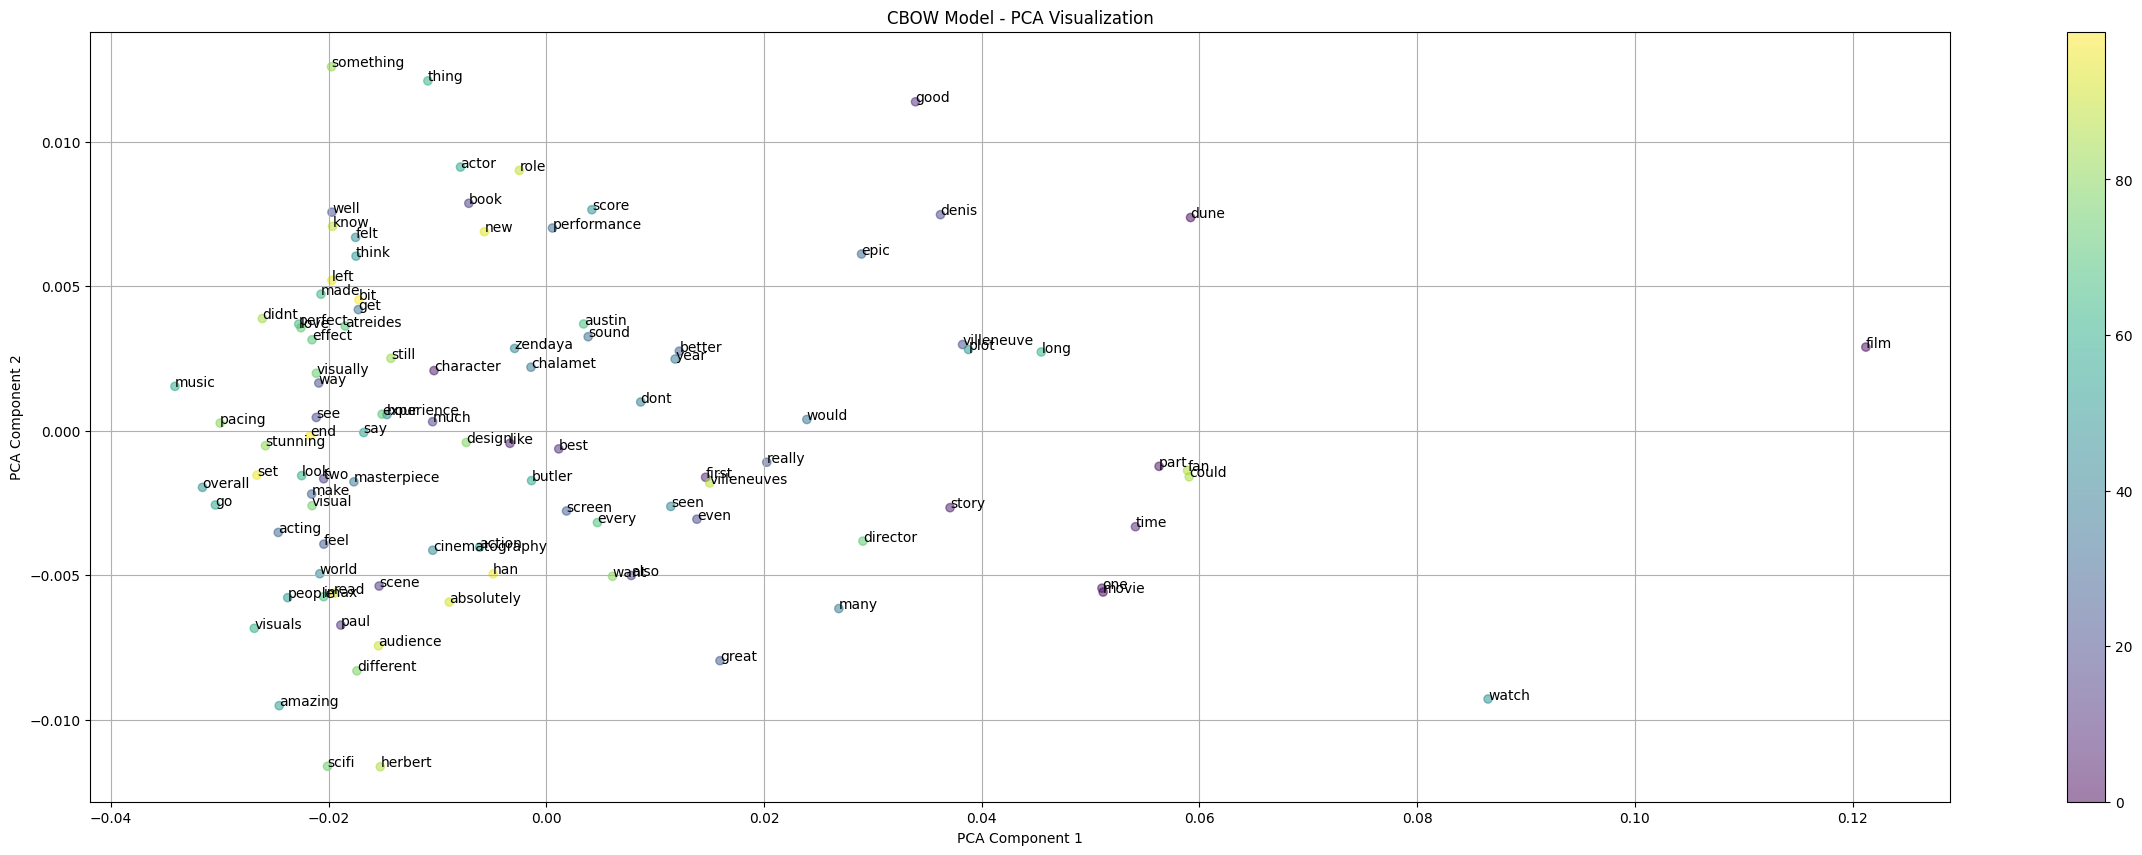

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


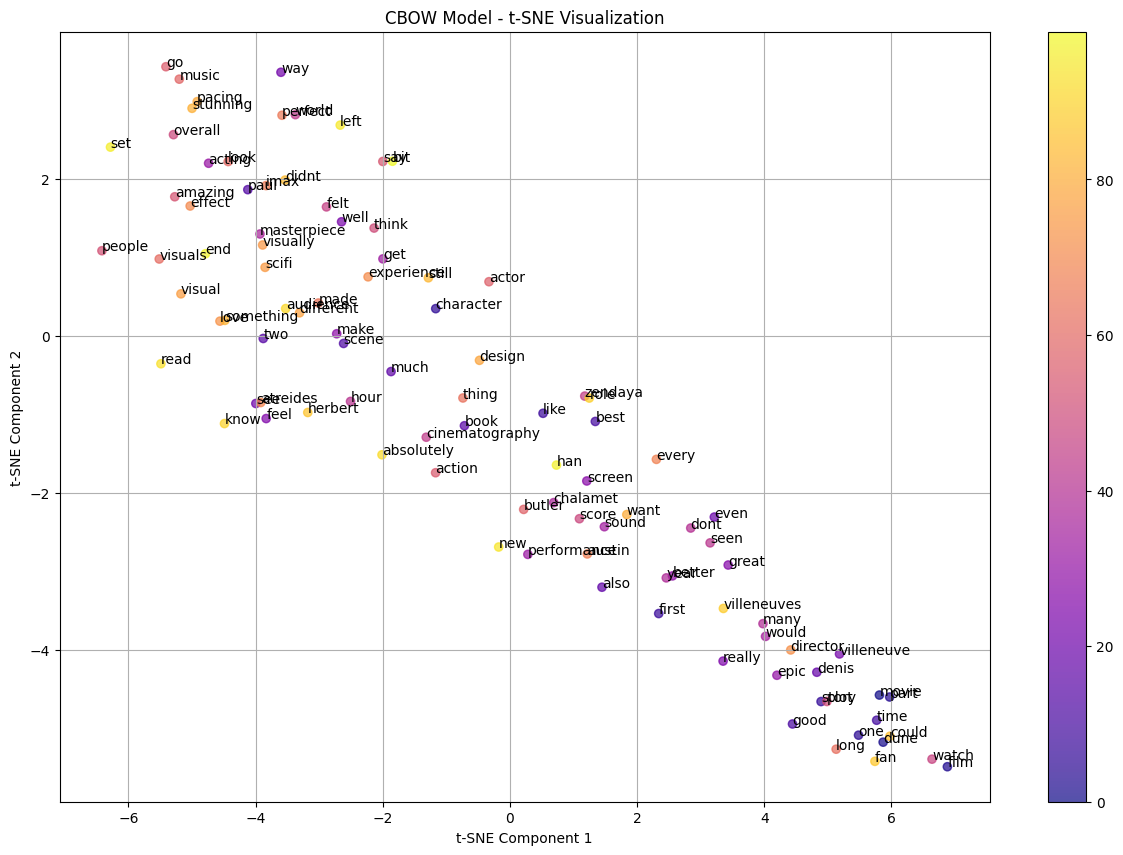

In [7]:
# PART 2: Function to visualize using PCA and t-SNE

def visualize_embeddings(model, title):
  # Get the list of words and corresponding vectors from the model
  words = list(model.wv.index_to_key)[:100]
  word_vectors = model.wv[words]

  colors = np.arange(len(words))

  # PCA Visualization
  pca = PCA(n_components=2,random_state=42)
  pca_result = pca.fit_transform(word_vectors)

  # Creating a scatter plot for PCA
  plt.figure(figsize=(30, 10))
  scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1],
                        c=np.arange(len(words)), cmap='viridis', alpha=0.5)
  plt.colorbar(scatter)

  # Annotate the words on the plot
  for i, word in enumerate(words):
    plt.annotate(word, (pca_result[i, 0], pca_result[i, 1]))

  plt.title(f'{title} - PCA Visualization')
  plt.xlabel('PCA Component 1')
  plt.ylabel('PCA Component 2')
  plt.grid(True)
  plt.show()

  # t-SNE Visualization
  tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
  tsne_result = tsne.fit_transform(word_vectors)

  # Creating scatter plot for t-SNE
  plt.figure(figsize=(15, 10))
  scatter = plt.scatter(tsne_result[:, 0], tsne_result[:, 1],
                        c=colors, cmap='plasma', alpha=0.7)
  plt.colorbar(scatter)

  # Annotate the words on the plot
  for i, word in enumerate(words):
    plt.annotate(word, (tsne_result[i, 0], tsne_result[i, 1]))

  plt.title(f'{title} - t-SNE Visualization')
  plt.xlabel('t-SNE Component 1')
  plt.ylabel('t-SNE Component 2')
  plt.grid(True)
  plt.show()

# Visualize CBOW model
visualize_embeddings(cbow_model, 'CBOW Model')


In [8]:
# PART 3: Calculate the cosine similarity between a few pairs of words

from scipy.spatial.distance import cosine

# load the vector model
model = Word2Vec.load("cbow_word2vec.model")

def cosine_similarity(word1, word2):
    # Get word vectors from the model
    vec1 = model.wv[word1]
    vec2 = model.wv[word2]

    # calculate cosine similarity
    similarity = 1 - cosine(vec1, vec2)
    return similarity

# Example word pairs to check similarity
word_pairs = [("visual", "effect"), ("movie", "scifi"), ("best", "acting")]

# Calculate and display the cosine similarity for each word pair
for word1, word2 in word_pairs:
    similarity = cosine_similarity(word1, word2)
    print(f"Cosine similarity between '{word1}' and '{word2}': {similarity:.4f}")

Cosine similarity between 'visual' and 'effect': 0.7003
Cosine similarity between 'movie' and 'scifi': 0.8487
Cosine similarity between 'best' and 'acting': 0.8761


## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.




1.   Which NLP Task you would like perform on your selected dataset
(NER, Summarization, Sentiment Analysis, Text classficication)
2.  Explain your labeling Schema you have used and mention those labels

3.  You can take AI assistance for labeling the data only.



In [9]:
# The GitHub link of your final csv file

# 1. I will be performing sentiment analysis on IMDB dataset.
# 2. I have used different key words to categorize the reviews into positive, negative or neutral. Below is the
#    Schema i have used:
"""
Positive: If the review contains words like amazing, excellent, loved, great, stunning, masterpiece,
it is labeled as positive.

Negative: If the review contains words like boring, terrible, worst, disappointing, dull, awful,
it is labeled as negative.

Neutral: If no strong positive or negative words are found,
the review is labeled as neutral.
"""

# Link:
https://github.com/uvsrahul1234/VenkataSaiRahul_INFO5731_Spring2025/blob/main/imdb_review_Sentiment_Analysis.csv



# Mandatory Question

Provide your thoughts on the assignment by filling this survey link. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [10]:
# This assignment was really useful in building the based knowledge on how models work internally.
# The time for this assignment is more than sufficient. The only challenging part I found is that,
# running a BERT model was little hard due to not enough computational sources.
# I really enjoyed creating images such as PCA and correlate it with cosine similarity.